# III.5 Interpolation and quadrature

_Polynomial interpolation_ is the process of finding a polynomial that equals data at a precise set of points.
_Quadrature_ is the act of approximating an integral by a weighted sum:
$$
\int_a^b f(x) w(x) {\rm d}x ≈ \sum_{j=1}^n w_j f(x_j).
$$
In these notes we see that the two concepts are intrinsically linked:  interpolation leads naturally
to quadrature rules. 

1. Polynomial Interpolation: we describe how to interpolate a function by a polynomial and a set of points.
2. Interpolatory quadrature rule: polynomial interpolation leads naturally to ways to integrate
functions, but onely realisable in the simplest cases.


## 1. Polynomial Interpolation

We already saw a special case of polynomial interpolation, where we saw that the polynomial
$$
f(z) ≈ ∑_{k=0}^{n-1} f̂_k^n z^k
$$
equaled $f$ at evenly spaced points on the unit circle: ${\rm e}^{{\rm i} 2π j/n}$. 
But here we consider the following:

**Definition 1 (interpolatory polynomial)** Given $n$ distinct points $x_1,…,x_n ∈ ℝ$ 
and $n$ _samples_ $f_1,…,f_n ∈ ℝ$, a degree $n-1$
_interpolatory polynomial_ $p(x)$ satisfies
$$
p(x_j) = f_j
$$

The easiest way to solve this problem is to invert the Vandermonde system:

**Definition 2 (Vandermonde)** The _Vandermonde matrix_ associated with $n$ distinct points $x_1,…,x_n ∈ ℝ$
is the matrix
$$
V := \begin{bmatrix} 1 & x_1 & ⋯ & x_1^{n-1} \\
                    ⋮ & ⋮ & ⋱ & ⋮ \\
                    1 & x_n & ⋯ & x_n^{n-1}
                    \end{bmatrix}
$$

**Proposition 1 (interpolatory polynomial uniqueness)** 
The interpolatory polynomial is unique, and the Vandermonde matrix is invertible.

**Proof**
Suppose $p$ and $p̃$ are both interpolatory polynomials. Then $p(x) - p̃(x)$ vanishes at $n$ distinct points $x_j$. By the fundamental theorem of
algebra it must be zero, i.e., $p = p̃$.

For the second part, if $V 𝐜 = 0$ for $𝐜 ∈ ℝ$ then for $q(x) = c_1 + ⋯ + c_n x^{n-1}$ we have
$$
q(x_j) = 𝐞_j^⊤ V 𝐜 = 0
$$
hence $q$ vanishes at $n$ distinct points and is therefore 0, i.e., $𝐜 = 0$.

∎

Thus a quick-and-dirty way to to do interpolation is to invert the Vandermonde matrix
(which we saw in the least squares setting with more samples then coefficients):

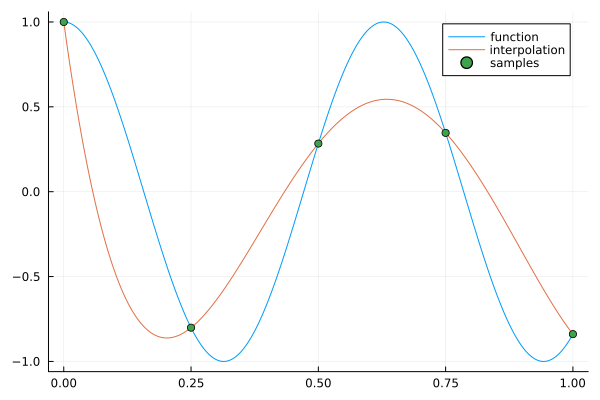

In [1]:
using Plots, LinearAlgebra
f = x -> cos(10x)
n = 5

x = range(0, 1; length=n)# evenly spaced points (BAD for interpolation)
V = x .^ (0:n-1)' # Vandermonde matrix
c = V \ f.(x) # coefficients of interpolatory polynomial
p = x -> dot(c, x .^ (0:n-1))

g = range(0,1; length=1000) # plotting grid
plot(g, f.(g); label="function")
plot!(g, p.(g); label="interpolation")
scatter!(x, f.(x); label="samples")

But it turns out we can also construct the interpolatory polynomial directly.
We will use the following which equal $1$ at one grid point
and zero at the others:

**Definition 3 (Lagrange basis polynomial)** The _Lagrange basis polynomial_ is defined as
$$
ℓ_k(x) := ∏_{j ≠ k} {x-x_j \over x_k - x_j} =  {(x-x_1) ⋯(x-x_{k-1})(x-x_{k+1}) ⋯ (x-x_n) \over (x_k - x_1) ⋯ (x_k - x_{k-1}) (x_k - x_{k+1}) ⋯ (x_k - x_n)}
$$

Plugging in the grid points verifies the following:

**Proposition 2 (delta interpolation)**
$$
ℓ_k(x_j) = δ_{kj}
$$

We can use these to construct the interpolatory polynomial:

**Theorem 1 (Lagrange interpolation)**
The unique  polynomial of degree at most $n-1$ that interpolates $f$ at $n$ distinct
points $x_j$ is:
$$
p(x) = f(x_1) ℓ_1(x) + ⋯ + f(x_n) ℓ_n(x)
$$

**Proof**
Note that
$$
p(x_j) = ∑_{j=1}^n f(x_j) ℓ_k(x_j) = f(x_j)
$$
so we just need to show it is unique. Suppose $p̃(x)$ is a  polynomial
of degree at most $n-1$
that also interpolates $f$. Then $p̃ - p$ vanishes at $n$ distinct points.
Thus by the fundamental theorem of algebra it must be zero.


∎

**Example 1** We can interpolate $\exp(x)$ at the points $0,1,2$:
$$
\begin{align*}
p(x) &= ℓ_1(x) + {\rm e} ℓ_2(x) + {\rm e}^2 ℓ_3(x) =
{(x - 1) (x-2) \over (-1)(-2)} + {\rm e} {x (x-2) \over (-1)} +
{\rm e}^2 {x (x-1) \over 2} \\
&= (1/2 - {\rm e} +{\rm e}^2/2)x^2 + (-3/2 + 2 {\rm e}  - {\rm e}^2 /2) x + 1
\end{align*}
$$


**Remark** Interpolating at evenly spaced points is a really **bad** idea:
interpolation is inheritely ill-conditioned. 
The labs have explored this issue experimentally.


## 2. Interpolatory quadrature rules

By integrating an interpolant exactly we get a simple approach to approximating
integrals. Using the Lagrange basis we can rewrite this procedure as a simple
weighted sum:

**Definition 4 (interpolatory quadrature rule)** Given a set of points $𝐱 = [x_1,…,x_n]$
the interpolatory quadrature rule is:
$$
Σ_n^{w,𝐱}[f] := ∑_{j=1}^n w_j f(x_j)
$$
where
$$
w_j := ∫_a^b ℓ_j(x) w(x) {\rm d} x
$$


**Proposition 3 (interpolatory quadrature is exact for polynomials)** 
Interpolatory quadrature is exact for all degree $n-1$ polynomials $p$:
$$
∫_a^b p(x) w(x) {\rm d}x = Σ_n^{w,𝐱}[p]
$$

**Proof**
The result follows since, by uniqueness of interpolatory polynomial:
$$
p(x) = ∑_{j=1}^n p(x_j) ℓ_j(x)
$$

∎

**Example 2 (arbitrary points)** Find the interpolatory quadrature rule for $w(x) = 1$ on $[0,1]$ with  points $[x_1,x_2,x_3] = [0,1/4,1]$?
We have:
$$
\begin{align*}
w_1 = \int_0^1 w(x) ℓ_1(x) {\rm d}x  = \int_0^1 {(x-1/4)(x-1) \over (-1/4)(-1)}{\rm d}x = -1/6 \\
w_2 = \int_0^1 w(x) ℓ_2(x) {\rm d}x  = \int_0^1 {x(x-1) \over (1/4)(-3/4)}{\rm d}x = 8/9 \\
w_3 = \int_0^1 w(x) ℓ_3(x) {\rm d}x  = \int_0^1 {x(x-1/4) \over 3/4}{\rm d}x = 5/18
\end{align*}
$$
That is we have
$$
Σ_n^{w,𝐱}[f]  = -{f(0) \over 6} + {8f(1/4) \over 9} + {5 f(1) \over 18}
$$
This is indeed exact for polynomials up to degree $2$ (and no more):
$$
Σ_n^{w,𝐱}[1] = 1, Σ_n^{w,𝐱}[x] = 1/2, Σ_n^{w,𝐱}[x^2] = 1/3, Σ_n^{w,𝐱}[x^3] = 7/24 ≠ 1/4.
$$

**Example 3 (Chebyshev roots)** Find the interpolatory quadrature rule for $w(x) = 1/\sqrt{1-x^2}$ on $[-1,1]$ with points equal to the
roots of $T_3(x)$. This is a special case of Gaussian quadrature which we will approach in another way below. We use:
$$
\int_{-1}^1 w(x) {\rm d}x = π, \int_{-1}^1 xw(x) {\rm d}x = 0, \int_{-1}^1 x^2 w(x) {\rm d}x = {π/2}
$$
Recall from before that $x_1,x_2,x_3 = \sqrt{3}/2,0,-\sqrt{3}/2$. Thus we have:
$$
\begin{align*}
w_1 = \int_{-1}^1 w(x) ℓ_1(x) {\rm d}x = \int_{-1}^1 {x(x+\sqrt{3}/2) \over (\sqrt{3}/2) \sqrt{3} \sqrt{1-x^2}}{\rm d}x = {π \over 3} \\
w_2 = \int_{-1}^1 w(x) ℓ_2(x) {\rm d}x = \int_{-1}^1 {(x-\sqrt{3}/2)(x+\sqrt{3}/2) \over (-3/4)\sqrt{1-x^2}}{\rm d}x = {π \over 3} \\
w_3 = \int_{-1}^1 w(x) ℓ_3(x) {\rm d}x = \int_{-1}^1 {(x-\sqrt{3}/2) x \over (-\sqrt{3})(-\sqrt{3}/2) \sqrt{1-x^2}}{\rm d}x = {π \over 3}
\end{align*}
$$
(It's not a coincidence that they are all the same but this will differ for roots of other OPs.) 
That is we have
$$
Σ_n^{w,𝐱}[f]  = {π \over 3}(f(\sqrt{3}/2) + f(0) + f(-\sqrt{3}/2)
$$
This is indeed exact for polynomials up to degree $n-1=2$, but it goes all the way up to $2n-1 = 5$:
$$
\begin{align*}
Σ_n^{w,𝐱}[1] &= π, Σ_n^{w,𝐱}[x] = 0, Σ_n^{w,𝐱}[x^2] = {π \over 2}, \\
Σ_n^{w,𝐱}[x^3] &= 0, Σ_n^{w,𝐱}[x^4] &= {3 π \over 8}, Σ_n^{w,𝐱}[x^5] = 0 \\
Σ_n^{w,𝐱}[x^6] &= {9 π \over 32} ≠ {5 π \over 16}
\end{align*}
$$
We shall explain this miracle in the next chapter.